The code follows more or less verbatim the tutorial [here](http://introtopython.org/visualization_earthquakes.html).

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = (18,18)

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [12]:
from __future__ import unicode_literals

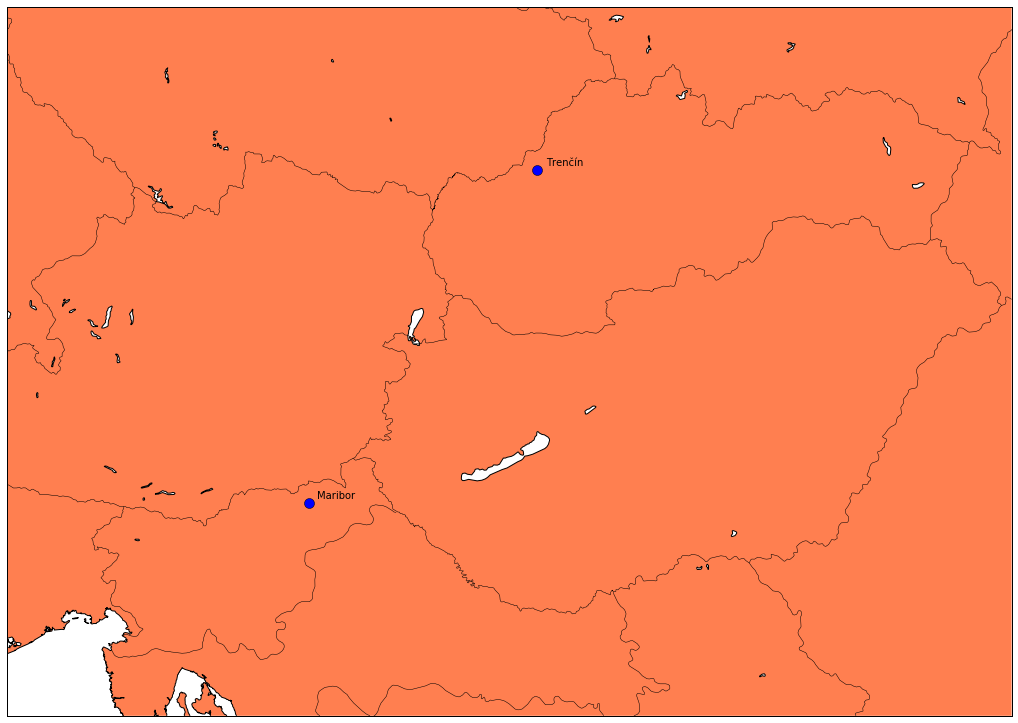

In [21]:
myMap = Basemap(projection='merc',lat_0=50,lon_0=20,resolution='h',area_thresh=1.,
                llcrnrlon=12.5,llcrnrlat=45.,urcrnrlon=23.,urcrnrlat=50.)
myMap.drawcoastlines()
myMap.drawcountries()
myMap.fillcontinents(color='coral')
myMap.drawmapboundary()

myMap.drawmeridians(np.arange(0.,360.,30.))
myMap.drawparallels(np.arange(-90,90,30))

lons = [18.04,15.65]
lats = [48.89,46.55]

x,y = myMap(lons,lats)

myMap.plot(x,y,'bo',markersize=10)

labels = ['Trenčín','Maribor']

for label,xpt,ypt in zip(labels,x,y):
    plt.text(xpt+10000,ypt+5000,label)

plt.show()

In [14]:
import pandas as pd

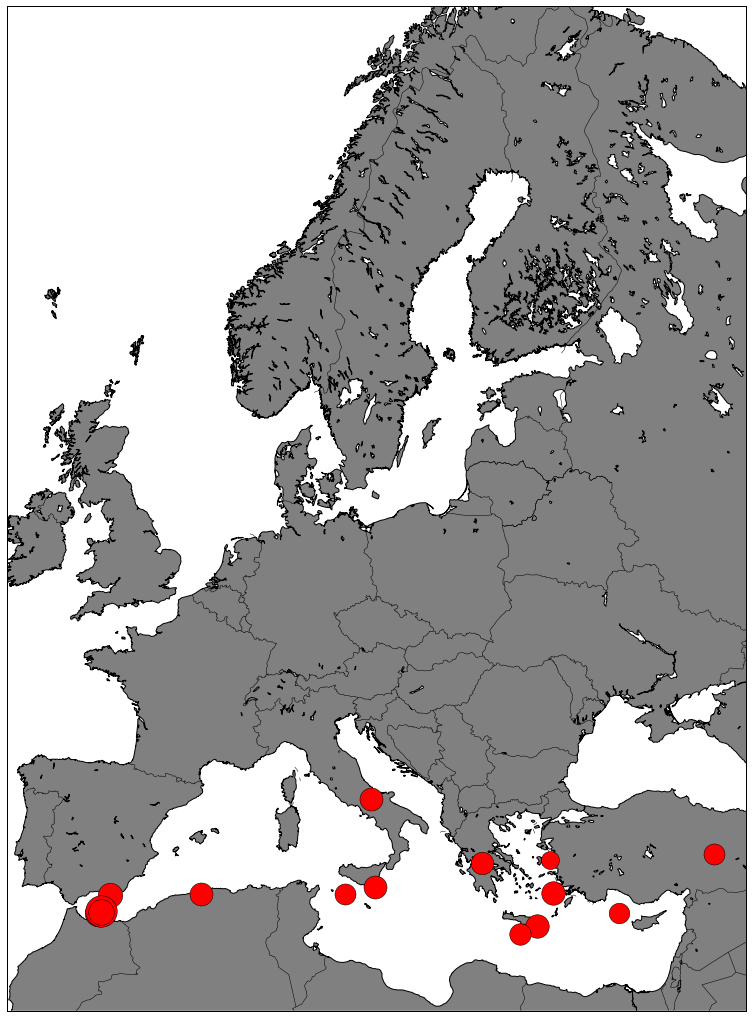

In [22]:
equakes = pd.read_csv('data/earthquakes_1.0_month.csv')

myMap = Basemap(projection='merc',lat_0=50,lon_0=20,resolution='i',area_thresh=40.,
                llcrnrlon=-10,llcrnrlat=30.,urcrnrlon=40.,urcrnrlat=70.)

myMap.drawcoastlines()
myMap.drawcountries()
myMap.fillcontinents(color='grey')
myMap.drawmapboundary()

#x,y = myMap(list(equakes['longitude']),list(equakes['latitude']))

#myMap.plot(x,y,'bo',markersize=10)

minSize = 5

for lon,lat,mag in zip(equakes['longitude'],equakes['latitude'],equakes['mag']):
    x,y = myMap(lon,lat)
    myMap.plot(x,y,'ro',markersize=minSize*mag)

plt.show()

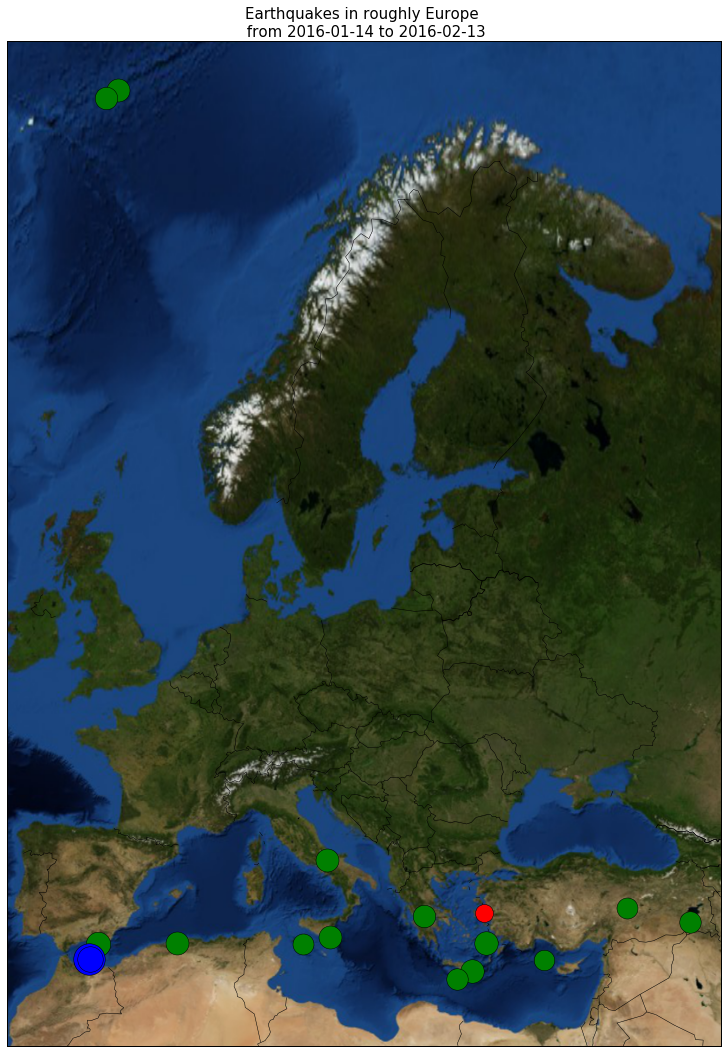

In [23]:
def getMarkerColor(mag):
    if mag<4.: 
        return 'ro'
    elif mag<5.:
        return 'go'
    else:
        return 'bo'

myMap = Basemap(projection='merc',lat_0=50,lon_0=20,resolution='l',area_thresh=100.,
                llcrnrlon=-10,llcrnrlat=30.,urcrnrlon=45.,urcrnrlat=73.)

#myMap.drawcoastlines()
myMap.drawcountries()
#myMap.fillcontinents(color='grey')
myMap.drawmapboundary()
myMap.bluemarble()

minSize = 5

for lon,lat,mag in zip(equakes['longitude'],equakes['latitude'],equakes['mag']):
    x,y = myMap(lon,lat)
    markerString = getMarkerColor(mag)
    myMap.plot(x,y,markerString,markersize=minSize*mag)
    
title = "Earthquakes in roughly Europe \n from "+list(equakes['time'])[-1][:10]+' to '+list(equakes['time'])[0][:10]
plt.title(title,size=15)    

plt.show()